# 다변량 분석

In [232]:
# 모듈 임포트!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

In [233]:
raw_data = pd.read_csv('/content/datasets/Samsung.csv')
print(raw_data.head())

         Date    Open    High     Low   Close    Adj Close      Volume
0  2000-01-04  6000.0  6110.0  5660.0  6110.0  4740.119629  74195000.0
1  2000-01-05  5800.0  6060.0  5520.0  5580.0  4328.947754  74680000.0
2  2000-01-06  5750.0  5780.0  5580.0  5620.0  4359.979492  54390000.0
3  2000-01-07  5560.0  5670.0  5360.0  5540.0  4297.916992  40305000.0
4  2000-01-10  5600.0  5770.0  5580.0  5770.0  4476.349121  46880000.0


In [234]:
# date 컬럼을 날짜 데이터 type으로 변환
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data.set_index('Date', inplace=True)

print(raw_data.head())

              Open    High     Low   Close    Adj Close      Volume
Date                                                               
2000-01-04  6000.0  6110.0  5660.0  6110.0  4740.119629  74195000.0
2000-01-05  5800.0  6060.0  5520.0  5580.0  4328.947754  74680000.0
2000-01-06  5750.0  5780.0  5580.0  5620.0  4359.979492  54390000.0
2000-01-07  5560.0  5670.0  5360.0  5540.0  4297.916992  40305000.0
2000-01-10  5600.0  5770.0  5580.0  5770.0  4476.349121  46880000.0


In [235]:
# 5개 칼럼만 사용
data = raw_data['2019-06-15':'2020-06-14'][['Open', 'High', 'Low', 'Close', 'Volume']]

print(data.head())
print(data.tail())
print(data.info())
print(data.shape)

               Open     High      Low    Close      Volume
Date                                                      
2019-06-17  43750.0  44050.0  43400.0  43900.0  11890424.0
2019-06-18  43750.0  44500.0  43650.0  44350.0   7994928.0
2019-06-19  45450.0  45450.0  45000.0  45350.0  10417690.0
2019-06-20  44850.0  45500.0  44850.0  45500.0   7147785.0
2019-06-21  45750.0  45800.0  45200.0  45700.0   9454913.0
               Open     High      Low    Close      Volume
Date                                                      
2020-06-08  56400.0  56500.0  54700.0  54900.0  25634965.0
2020-06-09  55800.0  56500.0  54400.0  55500.0  23998831.0
2020-06-10  55100.0  55900.0  54900.0  55400.0  16742493.0
2020-06-11  54500.0  55100.0  53200.0  54300.0  33815123.0
2020-06-12  52100.0  52800.0  51500.0  52300.0  26976019.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2019-06-17 to 2020-06-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  -

In [236]:
# nan 값 제거
data.dropna(inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2019-06-17 to 2020-06-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    245 non-null    float64
 1   High    245 non-null    float64
 2   Low     245 non-null    float64
 3   Close   245 non-null    float64
 4   Volume  245 non-null    float64
dtypes: float64(5)
memory usage: 11.5 KB
None


In [237]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()

scaled_data = minmaxscaler.fit_transform(data)

print(scaled_data[:5])
print(scaled_data.shape)

[[0.06410256 0.03598972 0.05670103 0.07035176 0.19996363]
 [0.06410256 0.05912596 0.06958763 0.09296482 0.1344523 ]
 [0.15128205 0.10796915 0.13917526 0.14321608 0.17519637]
 [0.12051282 0.11053985 0.1314433  0.15075377 0.12020573]
 [0.16666667 0.12596401 0.14948454 0.16080402 0.15900516]]
(245, 5)


In [238]:
# 각 길이가 28인 시퀀스로 만듦
sequence_X = []
sequence_Y = []

for i in range(len(scaled_data) - 28):
    _x = scaled_data[i: i+28]
    _y = scaled_data[i+28][3]
    if i is 0:
        print(_x, '->', _y)
    sequence_X.append(_x)
    sequence_Y.append(_y)

[[0.06410256 0.03598972 0.05670103 0.07035176 0.19996363]
 [0.06410256 0.05912596 0.06958763 0.09296482 0.1344523 ]
 [0.15128205 0.10796915 0.13917526 0.14321608 0.17519637]
 [0.12051282 0.11053985 0.1314433  0.15075377 0.12020573]
 [0.16666667 0.12596401 0.14948454 0.16080402 0.15900516]
 [0.13846154 0.12596401 0.14948454 0.15075377 0.10233377]
 [0.13846154 0.12596401 0.14948454 0.15577889 0.11901152]
 [0.16923077 0.13624679 0.17010309 0.16080402 0.15515711]
 [0.17948718 0.16709512 0.17783505 0.20100503 0.21195614]
 [0.23076923 0.18766067 0.22680412 0.22613065 0.2177698 ]
 [0.24871795 0.20822622 0.20360825 0.20603015 0.19143896]
 [0.18974359 0.18251928 0.18298969 0.18844221 0.14232519]
 [0.16666667 0.15424165 0.14948454 0.14572864 0.16261169]
 [0.14102564 0.14652956 0.15206186 0.1758794  0.10705111]
 [0.17692308 0.13367609 0.15206186 0.15829146 0.12167908]
 [0.11538462 0.07455013 0.1056701  0.09547739 0.13157513]
 [0.12051282 0.10796915 0.12371134 0.13065327 0.12859139]
 [0.15641026 0

In [239]:
# np.array화
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)

print(sequence_X[0])
print(sequence_Y[0])
print(sequence_X.shape)
print(sequence_Y.shape)

[[0.06410256 0.03598972 0.05670103 0.07035176 0.19996363]
 [0.06410256 0.05912596 0.06958763 0.09296482 0.1344523 ]
 [0.15128205 0.10796915 0.13917526 0.14321608 0.17519637]
 [0.12051282 0.11053985 0.1314433  0.15075377 0.12020573]
 [0.16666667 0.12596401 0.14948454 0.16080402 0.15900516]
 [0.13846154 0.12596401 0.14948454 0.15075377 0.10233377]
 [0.13846154 0.12596401 0.14948454 0.15577889 0.11901152]
 [0.16923077 0.13624679 0.17010309 0.16080402 0.15515711]
 [0.17948718 0.16709512 0.17783505 0.20100503 0.21195614]
 [0.23076923 0.18766067 0.22680412 0.22613065 0.2177698 ]
 [0.24871795 0.20822622 0.20360825 0.20603015 0.19143896]
 [0.18974359 0.18251928 0.18298969 0.18844221 0.14232519]
 [0.16666667 0.15424165 0.14948454 0.14572864 0.16261169]
 [0.14102564 0.14652956 0.15206186 0.1758794  0.10705111]
 [0.17692308 0.13367609 0.15206186 0.15829146 0.12167908]
 [0.11538462 0.07455013 0.1056701  0.09547739 0.13157513]
 [0.12051282 0.10796915 0.12371134 0.13065327 0.12859139]
 [0.15641026 0

In [240]:
# train set, test set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    sequence_X, sequence_Y, test_size = 0.2,
    random_state = 77)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(173, 28, 5)
(173,)
(44, 28, 5)
(44,)


In [241]:
# 모델링
model = Sequential()
# RNN모델보다 발전한 LSTM모델 사용

# 위에서 확인한 인덱스는 모델이 변경될 때마다 일일히 수정해주어야함
# 다른 모델 : SimpleRNN, GRU(LSTM보다 학습 시 소요 시간 짧음 = 효율 좋음), LSTM
model.add(LSTM(50, 
               input_shape=(X_train.shape[1], X_train.shape[2]), # 좀 더 간편하게 아예 인덱스 번호를 지정
                            activation='tanh'))
# 인덱스 번호 미지정시 코드
# model.add(LSTM(50, input_shape=(28, 1)))

model.add(Flatten())

# 값을 예측하기 위해 마지막 레이어에서는 activation function 사용 X
# activation function은 값을 0 혹은 1로 바꾸기 때문에 이진분류기에서만 사용
model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mse', optimizer='Adam')

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50)                11200     
_________________________________________________________________
flatten_9 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________


In [242]:
# 모델 학습
fit_hist = model.fit(X_train, Y_train,
                     epochs=350, 
                     validation_data=(X_test, Y_test),
                     shuffle=False)

Epoch 1/350
6/6 [==============================] - 2s 67ms/step - loss: 0.0789 - val_loss: 0.0121
Epoch 2/350
6/6 [==============================] - 0s 7ms/step - loss: 0.0234 - val_loss: 0.0269
Epoch 3/350
6/6 [==============================] - 0s 7ms/step - loss: 0.0132 - val_loss: 0.0075
Epoch 4/350
6/6 [==============================] - 0s 7ms/step - loss: 0.0115 - val_loss: 0.0077
Epoch 5/350
6/6 [==============================] - 0s 7ms/step - loss: 0.0111 - val_loss: 0.0069
Epoch 6/350
6/6 [==============================] - 0s 8ms/step - loss: 0.0085 - val_loss: 0.0096
Epoch 7/350
6/6 [==============================] - 0s 7ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 8/350
6/6 [==============================] - 0s 7ms/step - loss: 0.0073 - val_loss: 0.0063
Epoch 9/350
6/6 [==============================] - 0s 8ms/step - loss: 0.0074 - val_loss: 0.0061
Epoch 10/350
6/6 [==============================] - 0s 7ms/step - loss: 0.0071 - val_loss: 0.0068
Epoch 11/350
6/6 [==========

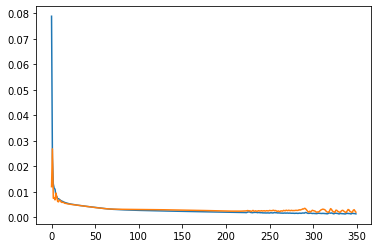

In [243]:
# 결과 plot
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

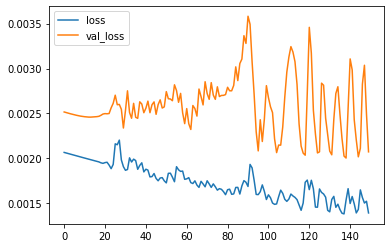

In [244]:
# 과적합 일어나는 구간 알아보기
plt.plot(fit_hist.history['loss'][200:350], label='loss')
plt.plot(fit_hist.history['val_loss'][200:350], label='val_loss')
plt.legend()
plt.show()

In [245]:
# 정확도 추출
predict = model.predict(X_test)

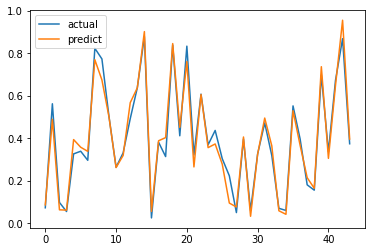

In [246]:
plt.plot(Y_test, label='actual')
plt.plot(predict, label='predict')
plt.legend()
plt.show()

# 최근 두 달 데이터 사용

In [247]:
test_data = raw_data['2021-04-15':'2021-06-14'][['Open', 'High', 'Low', 'Close', 'Volume']]

print(test_data.head())
print(test_data.info())
print(test_data.shape)

               Open     High      Low    Close      Volume
Date                                                      
2021-04-15  83700.0  84500.0  83400.0  84100.0  16377412.0
2021-04-16  84700.0  84700.0  83600.0  83900.0  15429522.0
2021-04-19  83800.0  84000.0  83300.0  83300.0  15287311.0
2021-04-20  83300.0  84000.0  83100.0  83900.0  15521965.0
2021-04-21  83300.0  83500.0  82500.0  82600.0  21636079.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2021-04-15 to 2021-06-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    40 non-null     float64
 1   High    40 non-null     float64
 2   Low     40 non-null     float64
 3   Close   40 non-null     float64
 4   Volume  40 non-null     float64
dtypes: float64(5)
memory usage: 1.9 KB
None
(40, 5)


In [248]:
# 스케일링
# fit_transform은 최솟값 최댓값을 찾아서 fit, transform은 이미 찾은 최솟값 최댓값에 맞춰줌
scaled_test_data = minmaxscaler.transform(test_data)
# scaled_test_data = minmaxscaler.fit_transform(test_data)

print(scaled_test_data[-5:])
print(scaled_test_data.shape)

[[2.06153846 2.02827763 2.0257732  1.9798995  0.27741983]
 [2.04102564 2.01799486 2.03608247 1.9798995  0.21494443]
 [2.         1.98714653 2.         1.93969849 0.25072465]
 [1.98974359 1.9562982  1.98969072 1.93467337 0.295764  ]
 [1.98461538 1.97172237 1.97938144 1.93467337 0.23692007]]
(40, 5)


In [249]:
scaled_test_data[39][3]

1.9346733668341702

In [250]:
orginal_value = minmaxscaler.inverse_transform(scaled_test_data[39].reshape(-1,5))
# inverse_transform로 스케일링된 결과 값으로 본래 값을 구함

print(original_value)

[[   80300.    80600.    79600.    80500. 13321324.]]


In [251]:
print(test_data.iloc[39])

Open         81200.0
High         81700.0
Low          80700.0
Close        81000.0
Volume    14087962.0
Name: 2021-06-11 00:00:00, dtype: float64


In [252]:
# 시퀀스 형태 데이터로 변환
sequence_testdata_X = []
sequence_testdata_Y = []

for i in range(len(scaled_test_data) - 28):
    _x = scaled_test_data[i: i+28]
    _y = scaled_test_data[i+28][3]
    sequence_testdata_X.append(_x)
    sequence_testdata_Y.append(_y)

# np.array화
sequence_testdata_X = np.array(sequence_testdata_X)
sequence_testdata_Y = np.array(sequence_testdata_Y)

print(sequence_testdata_X.shape)
print(sequence_testdata_Y.shape)

(12, 28, 5)
(12,)


In [253]:
predict = model.predict(sequence_testdata_X)

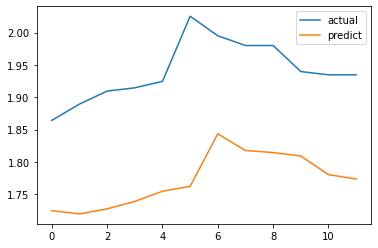

In [254]:
plt.plot(sequence_testdata_Y, label='actual')
plt.plot(predict, label='predict')
plt.legend()
plt.show()

## 오늘 종가 예측하기

In [255]:
last_28_data = scaled_test_data[-28:]
last_28_data.shape

(28, 5)

In [256]:
last_28_data = last_28_data.reshape(-1, 28, 5)
last_28_data.shape

(1, 28, 5)

In [257]:
today_close = model.predict(last_28_data)
print(today_close)

[[1.77426]]


In [258]:
scaled_test_data[39]

array([1.98461538, 1.97172237, 1.97938144, 1.93467337, 0.23692007])

In [259]:
# 종가만 있는 스케일러
minmaxscaler_close = MinMaxScaler()

_ = minmaxscaler_close.fit_transform(data['Close'])
today_close = minmaxscaler_close.inverse_transform(today_close)

print(today_close)

ValueError: ignored

In [ ]:
model = Sequential()
# RNN모델보다 발전한 LSTM모델 사용

# 위에서 확인한 인덱스는 모델이 변경될 때마다 일일히 수정해주어야함
model.add(SimpleRNN(50, 
               input_shape=(X_train.shape[1], X_train.shape[2]), # 좀 더 간편하게 아예 인덱스 번호를 지정
                            activation='tanh'))
# 인덱스 번호 미지정시 코드
# model.add(LSTM(50, input_shape=(28, 1)))

model.add(Flatten())

# 값을 예측하기 위해 마지막 레이어에서는 activation function 사용 X
# activation function은 값을 0 혹은 1로 바꾸기 때문에 이진분류기에서만 사용
model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mse', optimizer='Adam')

# 모델 확인
model.summary()

In [ ]:
# 모델 학습
fit_hist = model.fit(X_train, Y_train,
                     epochs=350, 
                     validation_data=(X_test, Y_test),
                     shuffle=False)

In [ ]:
# 결과 plot
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()